# Group Fake News Project
# Part 0: Form Study Groups
* Alf Kristiansen XGV820
* Alexander
* Victor
* Diego

# Part 1: Data Processing
### Task 1: Retrieve sample of FakeNewsCorups
https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv

Check requirements for version control for our libraries used in this project.
- MatPlotLib 
- scikit-learn
- pandas
- Selenium
- NLTK




In [ ]:
import pandas as pd
import nltk
import re
from nltk.stem.porter import *
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

english_stopwords = stopwords.words('english')

omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    df = df[df.type != omit_type]

stopwords = stopwords.words('english')
def full_clean(text: str, stopwords=english_stopwords):
    text = text.lower()

    text = re.sub(r'\n', ' ', text) # Remove newlines
    text = re.sub(r' +', ' ', text) # Remove multiple spaces

    text = re.sub(r'([a-zA-Z]+) (\d+)[, ]? (\d{4})', '<DATE>', text) # Date substitution
    text = re.sub(r'([.a-zA-Z0-9]+)@([-a-zA-Z0-9]+).([a-zA-Z]+)', '<EMAIL>', text) # E-Mail substitution
    text = re.sub(r'(https?:\/\/)?(www.)?([-.a-zA-Z0-9]+)[.](co.uk|com|org|net)\/?([\%\-\.\?\_=a-zA-Z0-9\/]+)?', '<URL>', text) # URL substitution
    text = re.sub(r'[0-9]+', '<NUM>', text) # Number substitution

    stemmer = PorterStemmer()                                   # Porter Stemmer from nltk
    tokens = nltk.word_tokenize(text)                           # Tokenizing the text
    tokens = [word for word in tokens if word.isalpha()]        # Removing punctuation
    tokens = [word for word in tokens if word not in stopwords] # Removing Stopwords
    tokens = [stemmer.stem(word) for word in tokens]            # Stemming all the words
    return ' '.join(tokens) # Returning a string consisting of each word in the list

def is_credible(article_type):
    if article_type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
        return int(0)
    
    elif article_type in ['clickbait', 'political', 'reliable']:
        return int(1)
    
    else:
        return int(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Task 2: Apply data pre-processing pipeline

In [ ]:
# Retrieve sample of FakeNewsCorpus
df = pd.read_csv("src/995,000_rows.csv", usecols = ["type", "content"])

# Remove na instances
df = df.dropna()
# Remove duplicates
df = df.drop_duplicates()

omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    df = df[df.type != omit_type]

# Apply full_clean on dataset
df["content"] = df["content"].apply(full_clean)

# Apply is_credible on dataset
df['type'] = df['type'].apply(is_credible)

# Save Cleaned Data
df.to_csv("src/clean_995000_news.csv", index=False)

# Display Sample Results
print(df[["content"]].head(10))

In [ ]:
# Read "cleaned_995000_news.csv"
new_sample = pd.read_csv("src/clean_995000_news.csv")
print(new_sample.head(100))

FileNotFoundError: [Errno 2] No such file or directory: 'src/cleaned_995000_news.csv'

### Task 3: Exploration of proccesed dataset

#### Distribution of types from original dataset

In [ ]:
# Read originial dataset for data exploration
news = pd.read_csv('src/995,000_rows.csv')

In [ ]:
# Function for counting instances of different types occuring in dataset
def count_types(article_types):
    found_types = {}

    for article_type in article_types:
        if article_type in found_types:
            found_types[article_type] += 1
        else:
            found_types[article_type] = 1

    return found_types

count_types(list(news['type']))

{'political': 194518,
 'fake': 104883,
 'satire': 13160,
 'reliable': 218563,
 'conspiracy': 97314,
 'bias': 133232,
 'clickbait': 27412,
 'hate': 8779,
 'junksci': 14040}

In [ ]:
# Count instances of fake or reliabe news
def fake_credible(types: dict):
    labels = [0, 0]
    
    for type in types:
        if type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
            labels[0] += types[type]
        elif type in ['clickbait', 'political', 'reliable']:
            labels[1] += types[type]

    return labels

print("For the original dataset:")
fake_credible(count_types(list(news['type'])))


[371408, 440493]

#### Vocab: frequency of words in cleaned dataset

In [44]:
vocab = []

for content in new_sample['content']:
    vocab.extend(nltk.word_tokenize(content))

vocab = [word for word in vocab if word.isalpha()]

In [45]:
def count_words(vocab):
    words = {}

    for word in vocab:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

    return words

In [ ]:
# Sort vocab from most frequent to least frequent
sorted_vocab = {k: v for k, v in sorted(count_words(vocab).items(), key = lambda item: item[1], reverse=True)}

In [ ]:
# New dataframe for the 10000 most frequent words
frequent_words_10k = pd.DataFrame({'word': list(sorted_vocab)[:10000]})
# Exporting dataframe to new csv filde
frequent_words_10k.to_csv("src/frequent_words_clean_10k.csv")

In [ ]:
# 10000 most frequent words
frequent_words_10k = dict(list(sorted_vocab.items()))
frequent_words_10k

{'num': 7386598,
 'said': 1192745,
 'one': 869736,
 'new': 817397,
 'would': 782571,
 'time': 781390,
 'state': 707026,
 'peopl': 704747,
 'year': 704408,
 'like': 663285,
 'also': 534112,
 'say': 479711,
 'make': 473540,
 'use': 470030,
 'us': 454982,
 'get': 452017,
 'go': 438699,
 'even': 433049,
 'work': 420898,
 'govern': 410175,
 'american': 403433,
 'two': 401558,
 'presid': 401314,
 'report': 398169,
 'could': 396724,
 'continu': 392624,
 'first': 390600,
 'mani': 389326,
 'stori': 384640,
 'read': 382306,
 'nation': 363569,
 'right': 359977,
 'day': 350528,
 'take': 347066,
 'world': 344425,
 'last': 338565,
 'way': 332397,
 'think': 330434,
 'want': 327039,
 'trump': 325470,
 'know': 322127,
 'call': 321342,
 'york': 320009,
 'url': 319339,
 'may': 318131,
 'news': 313463,
 'come': 309473,
 'countri': 306213,
 'need': 305071,
 'includ': 299840,
 'see': 294350,
 'obama': 287914,
 'back': 279592,
 'much': 277254,
 'unit': 274595,
 'well': 272231,
 'tri': 269833,
 'show': 269544

In [49]:
print('Amount of URLS:', sorted_vocab['url'])
print('Amount of Dates:', sorted_vocab['date'])
print('Amount of Numbers:', sorted_vocab['num'])
print('Amount of Emails:', sorted_vocab['email'])

Amount of URLS: 319339
Amount of Dates: 259170
Amount of Numbers: 7386598
Amount of Emails: 153647


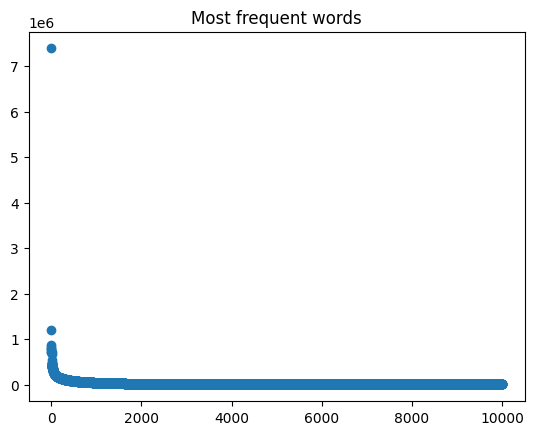

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(list(range(10000)), list(sorted_vocab.values())[:10000])
plt.title('Most frequent words')
plt.show()

The graph of most frequent words follow Zipf's law (which is a powerlaw)

### Task 4: split data
We use the sklearn train_test_split function to split the data into the different sets

In [56]:
from sklearn.model_selection import train_test_split

new_sample = new_sample[2:]

X = new_sample.drop(columns=["content"]).values  # Feature columns
y = new_sample["type"].values  # Target column

# 80% training and 20% rest for validation and test
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Split 20% into 10% validation and 10% test
X_test, X_val, y_test, y_val = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Print number of samples in each dataset
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 530839
Validation set size: 66355
Test set size: 66355


# Part 2: Simple Logitstic Regression

* Binary classification: `reliabe` or `fake`

### Task 0: Label grouping
0: `fake`
1: `reliable`

From part 1 task 1 we've defined a function `is_credible()` and classified the types into reliable or fake by using binary classification.

### Task 1: Logistic regression classifier
* Fixed vocab of 10000 most frequent words.

* F1 score

In [11]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# 10000 most frequent words
freq_words = pd.read_csv('src/frequent_words_10k.csv')

def text_to_features(text, vocab):
    """Convert text into a word frequency vector based on a fixed vocabulary."""
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenization using regex
    word_counts = Counter(words)  # Count occurrences of each word
    return [word_counts.get(word, 0) for word in vocab]  # Keep only vocab words

# Apply Function to the Entire Dataset
X = np.array([text_to_features(content, freq_words) for content in new_sample["content"]])
y = new_sample["type"].values  # Target variable

# Train/Test Split (80% Train, 10% Validation, 10% Test)
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Train Logistic Regression Model
modelLog = LogisticRegression(max_iter=500, solver="lbfgs", C=1.0)
modelLog.fit(X_train, y_train)

# Make Predictions
y_pred = modelLog.predict(X_val)

# Evaluate Model Performance
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print Results
print("Logistic Regression Accuracy: ", accuracy)
print("Logistic Regression F1-score: ", f1)

NameError: name 'new_sample' is not defined

### Task 2: meta-data features?

### Task 3: Apply preproccessing pipeline to scraped reliable data

In [ ]:
target_news = pd.read_csv("src/bbc_news.csv")
target_news["content"] = target_news["content"].apply(full_clean)
target_news.to_csv("src/clean_bbc_news.csv", index=False)

In [9]:
new_news = pd.read_csv("src/clean_bbc_news.csv")

# Transform the "content" Column into Word Count Vectors
X_new = np.array([text_to_features(content, freq_words) for content in new_news["content"]])

# Predict Fake or Reliable
new_predictions = modelLog.predict(X_new)

# Store Results
new_news["prediction"] = new_predictions  # Append predictions to the dataset

# Save Predictions to a CSV File
new_news.to_csv("src/classified_bbc_news.csv", index=False)

# Display Results
print(new_news[["content", "prediction"]].head(10))  # Show first 10 predictions

NameError: name 'np' is not defined

In [8]:
classified_news = pd.read_csv("src/classified_bbc_news.csv")
classified_news["prediction"]

def counting(classified):
    reliable = 0
    fake = 0

    for classification in classified:
        if classification == 0 :
            fake += 1
        elif classification == 1:
            reliable += 1

    return (f"classified articles fake: {fake}, and reliable: {reliable}")

counting(list(classified_news['prediction']))

'classified articles fake: 0, and reliable: 672'

# Part 3: Advanced model